In [49]:
import random
from qiskit.quantum_info import Statevector

# Lets say we have 8 companies and we have to find the stock ticker symbol for:

# ["Apple": {AAPL = 0}, “Yahoo”: {YHOO = 1}, “Amazon”: {AMZN = 2},
# “Microsoft”: {MSFT = 3} , “Meta Platforms Inc”: {META = 4}, 
# “International Business Machines”: {IBM = 5}, “Dell Technologies”: {DELL = 6}, 
# “Alphabet”: {GOOG = 7} ]

# Let's assume the stock symbols are represented by the numbers defined from 0-7 
secret = random.randint(0,7)  # the expected stock ticker symbol is randomly picked 
secret_string = format(secret, '03b')  # format the stock ticker symbol in 3-bit string
oracle = Statevector.from_label(secret_string)  # let the oracle know the stock ticker symbol

In [37]:
from qiskit.algorithms import AmplificationProblem

problem = AmplificationProblem(oracle, is_good_state=secret_string)

In [38]:
from qiskit.algorithms import Grover

grover_circuits = []
for iteration in range(1,3):
    grover = Grover(iterations=iteration)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    grover_circuits.append(circuit)

In [39]:
# Grover's circuit with 1 iteration
grover_circuits[0].draw()

┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

In [40]:
# Grover's circuit with 2 iterations
grover_circuits[1].draw()

┌───┐┌────┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├┤0   ├─░─┤M├──────
        ├───┤│    ││    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    ││    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘└────┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════╩══╩══╩═
                             0  1  2

In [44]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = "ibmq_qasm_simulator"  # use the simulator

with Session(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(circuits=grover_circuits, shots=1000)
    result = job.result()
    print(result)

SamplerResult(quasi_dists=[{2: 0.031, 1: 0.025, 5: 0.027, 6: 0.029, 4: 0.037, 0: 0.784, 7: 0.033, 3: 0.034}, {2: 0.009, 5: 0.005, 1: 0.007, 3: 0.01, 0: 0.941, 7: 0.01, 6: 0.01, 4: 0.008}], metadata=[{'header_metadata': {}, 'shots': 1000}, {'header_metadata': {}, 'shots': 1000}])


As you can see, the quantum computer returned '000' as the answer with highest probability.
And the results with 2 iterations have higher probability than the results with 1 iteration.


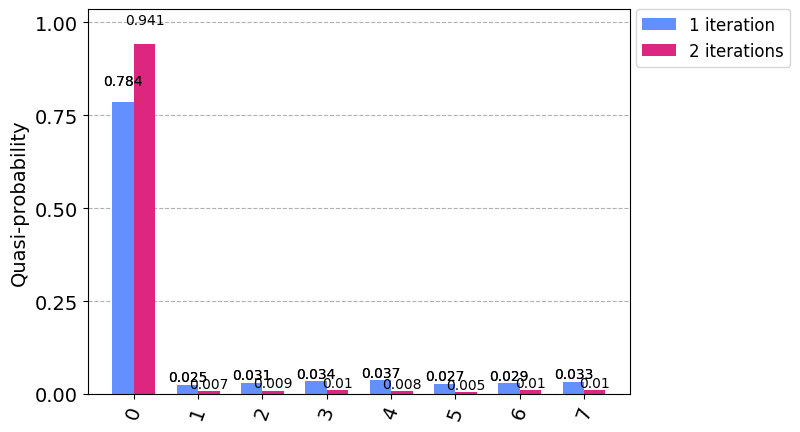

In [45]:
from qiskit.tools.visualization import plot_histogram

# Extract bit string with highest probability from results as the answer

result_dict = result.quasi_dists[1].binary_probabilities()
answer = max(result_dict, key=result_dict.get)
print(f"As you can see, the quantum computer returned '{answer}' as the answer with highest probability.\n"
       "And the results with 2 iterations have higher probability than the results with 1 iteration."
)

# Plot the results
plot_histogram(result.quasi_dists, legend=['1 iteration', '2 iterations'])

In [46]:
# Print the results and the correct answer.
print(f"Quantum answer for stock symbol: {answer}")
print(f"Correct answer for stock symbol : {secret_string}")
print('Success!' if answer == secret_string else 'Failure!')

Quantum answer: 000
Correct answer: 000
Success!


In [1]:
%matplotlib inline
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import *
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

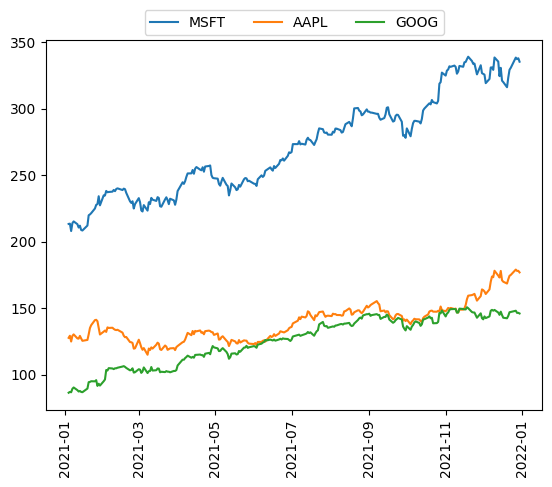

In [4]:
try:
    data = YahooDataProvider(
        tickers=["MSFT", "AAPL", "GOOG"],
        start=datetime.datetime(2021, 1, 1),
        end=datetime.datetime(2021, 12, 31),
    )
    data.run()
    for (cnt, s) in enumerate(data._tickers):
        plt.plot(data._data[cnt], label=s)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)
    plt.xticks(rotation=90)
    plt.show()
except QiskitFinanceError as ex:
    data = None
    print(ex)